# <span style="color:deepskyblue">8.3 PCA </span>    
--- 

주성분 분석(Principal Component Analysis, PCA)는 데이터에 가장 가까운 초평면을 정의한 후, 데이터를 이 평면에 투영시키는 방식

## <span style="color:lightpink">8.3.1 분산 보존</span>

- 저차원의 초평면에 훈련 세트를 투영하기 전에 올바른 초평면을 선택  

#### 그림8-7 투영할 부분 공간 선택

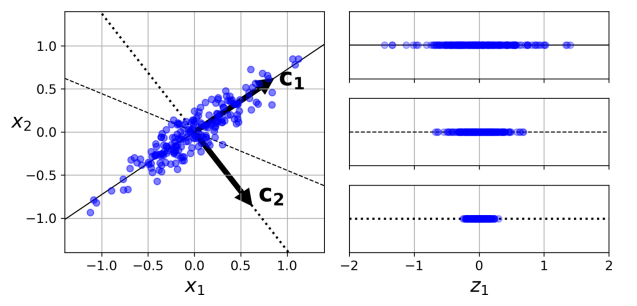


- 오른쪽 그래프는 각 축에 투영된 결과인데, 실선은 분산을 최대로 보존하며, 점선은 분산을 매우 적게 유지하고, 파선은 중간 정도로 분산을 유지  
- 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적 -> 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축 선택.

## <span style="color:lightpink">8.3.2 주성분</span>

- PCA는 훈련 세트에서 분산이 최대인 축을 찾음 -> 실선  
- 첫번째 축에 직교하고 남은 분산을 최대로 보존하는 두번째 축을 찾음 -> 점선  
- 고차원 데이터셋이라면 이전의 두 축에 직교하는 세번째 축을 찾으며, 데이터 셋에 있는 차원의 수 만큼 n번째 축을 찾음 -> n번째 축을 이 데이터의 n번째 주성분(PC)
- 그림에서 첫번째 PC는 벡터 c1이 놓인 축, 두번째 PC는 벡터 c2가 놓인 축, 세번째 PC는 이 평면에 수직 
- 특잇값 분해(Singular Value Decomposition, SVD)라는 표준 행렬 분해 기술로, 훈련 세트의 주성분을 찾음 -> 훈련 세트 행렬을 세 개 행렬의 곱셈으로 분해  

### 식 8-1 주성분 행렬

$\mathbf{V}=\begin{pmatrix}
| & | & | \\
\mathbf{c_1}& ... &\mathbf{c_n}  \\
| & | & |  \\
\end{pmatrix}$

중앙에 맞춰진 훈련 세트의 공분산 행렬  
$cov=\frac{1}{n-1}\mathbf{X^T}\mathbf{X}=\frac{1}{n-1}\mathbf{(U\Sigma V^T)^T}\mathbf{(U\Sigma V^T)}
= \frac{1}{n-1}\mathbf{(V\Sigma U)}\mathbf{(U\Sigma V^T)}=\frac{1}{n-1}\mathbf{(V\Sigma^2 V^T)}$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
np.random.seed(42)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5 
X = np.empty((m,3))
X[:,0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:,1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:,2] = X[:,0] * w1 + X[:,1] * w2 + noise * np.random.randn( m )

In [3]:
X_centered = X - X.mean(axis = 0) # 평균이 0이라고 가정되어있기 때문에 centering
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0] # 제 1 주성분
c2 = Vt.T[:,1] # 제 2 주성분

## <span style="color:lightpink">8.3.3 d차원으로 투영하기</span>

주성분을 모두 추출한 후, 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소 가능 -> 이 초평면은 분산을 가능한 한 최대로 보존.

### 식 8-2  d차원으로 투영

$\mathbf{X_{d-proj}}=\mathbf{XW_d}$

$\mathbf{X}$가 60 by 3이므로 $\mathbf{W_d}$는 3 by 2가 되고 $\mathbf{X_{d-proj}}$는 60 by 2가 된다

In [7]:
W2 = Vt.T[:,:2] # 제 1 주성분, 제 2 주성분 한 번에 저장
X2D = X_centered.dot(W2) # Projection onto 2 dimension

## <span style="color:lightpink">8.3.4 사이킷런 사용하기</span>

components_ 변수에  $\mathbf{W_d}$의 전치가 담김.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

## <span style="color:lightpink">8.3.5 설명된 분산의 비율</span>

In [9]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## <span style="color:lightpink">8.3.6 적절한 차원 수 선택하기</span>

In [11]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [12]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

- 축소할 차원 수를 임의로 정하는 것보다 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단 -> n_components에 주성분의 수 지정하지말고 분산의 비율을 0~1 사이로 설정 
- 데이터 시각화를 위해 차원 축소할 때는 2,3개로 줄이는 것이 일반적.  
- 다른 방법으로는 설명된 분산을 차원 수에 대한 함수로 그리기(cumsum을 그래프로 그림)

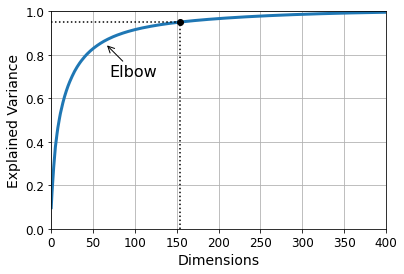

In [15]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

## <span style="color:lightpink">8.3.7 압축을 위한 PCA</span>

- 차원축소 후에는 훈련 세트의 크기가 줄어들며, 이러한 크기 축소는 SVM같은 분류 알고리즘의 속도를 높일 수 있음
- 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 되돌릴 수도 있으나(inverse_transform), 일정량의 정보를 잃어버렸기 때문에 완전히 동일하지는 않음 
- 재구성 오차(Reconstruction error)은 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리

In [16]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [17]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

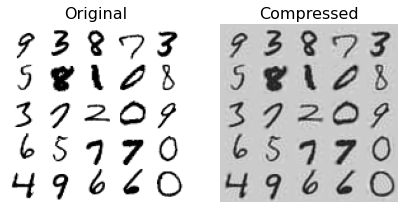

In [18]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### 식 8-3 PCA 역변환

$\mathbf{X_{recovered}}=\mathbf{X_{d-proj}}\mathbf{W_d^T}$

## <span style="color:lightpink">8.3.8 랜덤 PCA</span>

- 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾을 수 있음 -> svd_solver 매개변수를 'randomized'로 지정
- Default값은 auto -> m 또는 n이 500보다 크고, d가 m 또는 n의 80%보다 작으면 자동으로 랜덤 PCA 사용. 완전 SVD 방식을 쓰려면 'full'로 지정

In [19]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## <span style="color:lightpink">8.3.9 점진적 PCA</span>

- PCA는 훈련 세트가 크면 메모리에서 받아들일 수 없는 문제점이 존재 -> 점진적 PCA(Incremental PCA, IPCA)로 미니배치로 나누어 훈련세트가 커도 유용하게 만듬.  
- Scikit-learn에서는 IncrementalPCA를 사용하고, numpy의 memmap 클래스를 사용할 수도 있음.

In [20]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [22]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [23]:
del X_mm

In [24]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)